In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf

In [2]:
egg=pd.read_csv("shinmei_egg_20150721_20180528.csv",encoding="UTF-8",parse_dates = ['date_ymd'])

In [3]:
egg=egg.sort_values("date_ymd")

In [4]:
egg=egg.query('ten_cd==1')#ten_cd=1はどこの店かを確認

In [5]:
egg=egg.fillna(0)#何も企画がない日を0にする

In [6]:
egg_train=egg.query('"2015-02-28"<=date_ymd<="2018-04-30"')

In [7]:
egg_test=egg.query('"2018-05-01"<=date_ymd<="2018-05-29"')

In [8]:
egg_train["kikaku_cd"]=egg_train["kikaku_cd"].astype("int64")
egg_test["kikaku_cd"]=egg_test["kikaku_cd"].astype("int64")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
egg_train

,date_ymd,plu_cd,ten_cd,uri_su,uri_kin,kikaku_cd
888,2015-02-28,49377743,1,11,2398,0
230,2015-03-01,49377743,1,112,12096,0
238,2015-03-02,49377743,1,11,2508,0
1924,2015-03-03,49377743,1,6,1368,0
266,2015-03-04,49377743,1,4,912,0
939,2015-03-05,49377743,1,13,2964,0
1959,2015-03-06,49377743,1,5,1140,0
58,2015-03-07,49377743,1,11,2508,0
2238,2015-03-08,49377743,1,3,638,0
378,2015-03-09,49377743,1,12,2529,0


In [10]:
egg_test

,date_ymd,plu_cd,ten_cd,uri_su,uri_kin,kikaku_cd
43216,2018-05-02,49377743,1,1,228,0
42345,2018-05-03,49377743,1,10,2280,0
42609,2018-05-04,49377743,1,4,912,0
42624,2018-05-05,49377743,1,8,1824,0
36632,2018-05-06,49377743,1,190,20520,310160000
36633,2018-05-06,49377743,1,190,20520,738490000
38222,2018-05-07,49377743,1,2,456,0
38223,2018-05-08,49377743,1,8,1824,0
42736,2018-05-10,49377743,1,4,912,0
42765,2018-05-11,49377743,1,5,1140,0


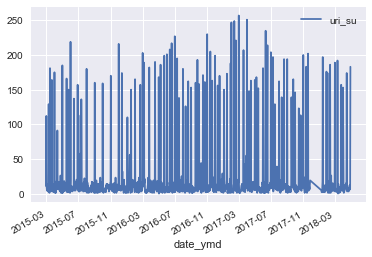

In [11]:
egg_train.plot(x='date_ymd', y='uri_su')

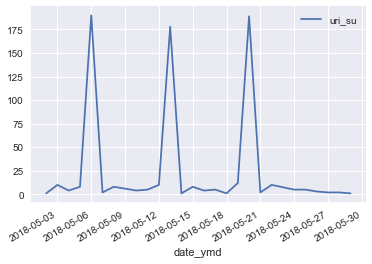

In [12]:
egg_test.plot(x='date_ymd', y='uri_su')

In [13]:
egg_train["flag"]=egg_train["kikaku_cd"].apply(lambda x:"kikakuTrue" if x !=0 else "kikakuFalse")
egg_test["flag"]=egg_test["kikaku_cd"].apply(lambda x:"kikakuTrue" if x !=0 else "kikakuFalse")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
egg_train

,date_ymd,plu_cd,ten_cd,uri_su,uri_kin,kikaku_cd,flag
888,2015-02-28,49377743,1,11,2398,0,kikakuFalse
230,2015-03-01,49377743,1,112,12096,0,kikakuFalse
238,2015-03-02,49377743,1,11,2508,0,kikakuFalse
1924,2015-03-03,49377743,1,6,1368,0,kikakuFalse
266,2015-03-04,49377743,1,4,912,0,kikakuFalse
939,2015-03-05,49377743,1,13,2964,0,kikakuFalse
1959,2015-03-06,49377743,1,5,1140,0,kikakuFalse
58,2015-03-07,49377743,1,11,2508,0,kikakuFalse
2238,2015-03-08,49377743,1,3,638,0,kikakuFalse
378,2015-03-09,49377743,1,12,2529,0,kikakuFalse


In [15]:
kikaku_dummy = pd.get_dummies(egg_train['flag'], drop_first = False)
kikaku_dummy_test = pd.get_dummies(egg_test['flag'], drop_first = False)

In [16]:
egg_train= pd.concat([egg_train, kikaku_dummy],axis=1)
egg_test= pd.concat([egg_test, kikaku_dummy_test],axis=1)

In [17]:
egg_train.reset_index()

,index,date_ymd,plu_cd,ten_cd,uri_su,uri_kin,kikaku_cd,flag,kikakuFalse,kikakuTrue
0,888,2015-02-28,49377743,1,11,2398,0,kikakuFalse,1,0
1,230,2015-03-01,49377743,1,112,12096,0,kikakuFalse,1,0
2,238,2015-03-02,49377743,1,11,2508,0,kikakuFalse,1,0
3,1924,2015-03-03,49377743,1,6,1368,0,kikakuFalse,1,0
4,266,2015-03-04,49377743,1,4,912,0,kikakuFalse,1,0
5,939,2015-03-05,49377743,1,13,2964,0,kikakuFalse,1,0
6,1959,2015-03-06,49377743,1,5,1140,0,kikakuFalse,1,0
7,58,2015-03-07,49377743,1,11,2508,0,kikakuFalse,1,0
8,2238,2015-03-08,49377743,1,3,638,0,kikakuFalse,1,0
9,378,2015-03-09,49377743,1,12,2529,0,kikakuFalse,1,0


In [18]:
lm_egg=smf.ols("uri_su~kikakuFalse+kikakuTrue",data=egg_train).fit()

In [19]:
lm_egg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 uri_su   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     1828.
Date:                Wed, 16 Jan 2019   Prob (F-statistic):          2.62e-238
Time:                        21:38:50   Log-Likelihood:                -5645.5
No. Observations:                1131   AIC:                         1.129e+04
Df Residuals:                    1129   BIC:                         1.131e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      64.7986      1.262     51.361      0.000      62.323      67.274
kikakuFalse   -48.5162      1.415    -34.295      0.000     -51.292     -45.741
kikakuTrue    113.3148      2.441     46.426      0.000     108.526     118.104
==============================================================================
Omnibus:                      909.651   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14700.432
Skew:                           3.781   Prob(JB):                         0.00
Kurtosis:                      18.961   Cond. No.                     1.16e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
egg_test_data=egg_test.loc[:,['kikakuFalse','kikakuTrue']]

In [33]:
import matplotlib.pyplot as plt
predict=lm_egg.predict(egg_test_data)
test=pd.DataFrame({
              "date_ymd":egg_test["date_ymd"],
              "pred_uri_su":predict,
                 })

In [34]:
test

,date_ymd,pred_uri_su
43216,2018-05-02,16.282398
42345,2018-05-03,16.282398
42609,2018-05-04,16.282398
42624,2018-05-05,16.282398
36632,2018-05-06,178.113402
36633,2018-05-06,178.113402
38222,2018-05-07,16.282398
38223,2018-05-08,16.282398
42736,2018-05-10,16.282398
42765,2018-05-11,16.282398


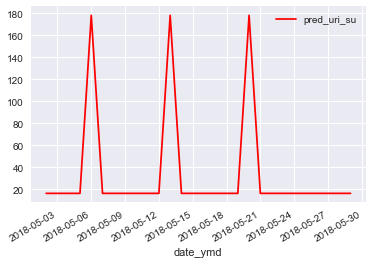

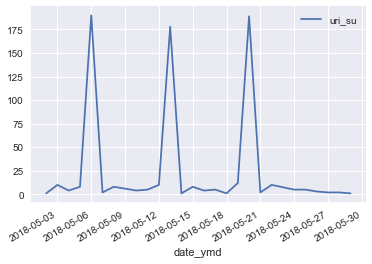

In [40]:
test.plot(x='date_ymd', y='pred_uri_su',color="red")
egg_test.plot(x='date_ymd', y='uri_su')